In [1]:
import numpy as np 
import pandas as pd 
import re

In [2]:
product = pd.read_csv('ProductsData.csv')

In [3]:
product.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,"""chambre a coucher ""","""40008817""","""Meubles et d�coration """,1 800,"""private""","""Grand Casablanca""","""Casablanca"""
1,"""Comte free fire""","""40008816""","""Jeux vid�o et consoles """,�,"""private""","""Grand Casablanca""","""Casablanca"""
2,"""Iphone 6 plus""","""40008815""","""T�l�phones """,�,"""private""","""Grand Casablanca""","""Casablanca"""
3,"""Renault ""","""40008814""","""Voitures """,�,"""private""","""Chaouia-Ouardigha""","""Settat"""
4,"""PS3 SLIM 360 GB ""","""40008812""","""Jeux vid�o et consoles """,1 400,"""private""","""Rabat-Sal�-Zemmour-Za�r""","""Sala Al-Jadida"""


In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              4350 non-null   object
 1   Product_id                4350 non-null   object
 2   Product_Category          4350 non-null   object
 3   price                     3580 non-null   object
 4   Professional_Publication  4350 non-null   object
 5   Region_address            4350 non-null   object
 6   Local_address             4350 non-null   object
dtypes: object(7)
memory usage: 238.0+ KB


In [5]:
# removing the quotes from every value
for i, col in enumerate(product.columns):
    product.iloc[:, i] = product.iloc[:, i].str.replace('"', '')

In [6]:
product

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et d�coration,1 800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vid�o et consoles,�,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,T�l�phones,�,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,�,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vid�o et consoles,1 400,private,Rabat-Sal�-Zemmour-Za�r,Sala Al-Jadida
...,...,...,...,...,...,...,...
4345,XN-C11,39234529,Instruments de musique,90,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20 000,private,Grand Casablanca,Mohammedia
4347,???? ????????? ????? ????,39234526,Mat�riels professionnels,�,pro,Grand Casablanca,Casablanca
4348,Poussette Bugaboo cameleon 3 black,39234524,Equipements pour enfant et b�b�,1 850,private,Tanger-T�touan,Tanger


In [7]:
# replacing empty strings with NaN
product = product.replace(r'^\se*$', np.NaN, regex=True) 

In [8]:
product = product.replace('?','e')
product

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et d�coration,1 800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vid�o et consoles,�,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,T�l�phones,�,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,�,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vid�o et consoles,1 400,private,Rabat-Sal�-Zemmour-Za�r,Sala Al-Jadida
...,...,...,...,...,...,...,...
4345,XN-C11,39234529,Instruments de musique,90,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20 000,private,Grand Casablanca,Mohammedia
4347,???? ????????? ????? ????,39234526,Mat�riels professionnels,�,pro,Grand Casablanca,Casablanca
4348,Poussette Bugaboo cameleon 3 black,39234524,Equipements pour enfant et b�b�,1 850,private,Tanger-T�touan,Tanger


In [9]:
product['Product_name'] = product['Product_name'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)

product['price'] = product['price'].str.replace(' ', '')

In [10]:
product

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et d�coration,1800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vid�o et consoles,�,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,T�l�phones,�,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,�,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vid�o et consoles,1400,private,Rabat-Sal�-Zemmour-Za�r,Sala Al-Jadida
...,...,...,...,...,...,...,...
4345,XN-C11,39234529,Instruments de musique,90,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20000,private,Grand Casablanca,Mohammedia
4347,NaN,39234526,Mat�riels professionnels,�,pro,Grand Casablanca,Casablanca
4348,Poussette Bugaboo cameleon 3 black,39234524,Equipements pour enfant et b�b�,1850,private,Tanger-T�touan,Tanger


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Professional_Publication', ylabel='count'>

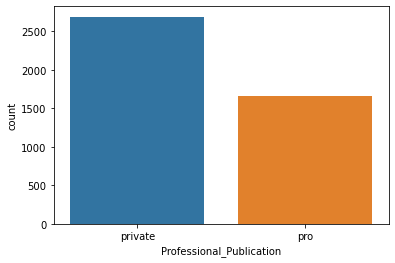

In [12]:
sns.countplot(x='Professional_Publication',data=product)

<AxesSubplot:xlabel='count', ylabel='Region_address'>

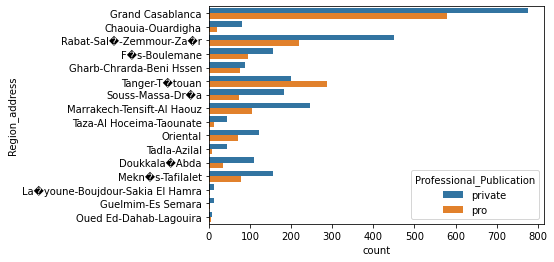

In [13]:
sns.countplot(y='Region_address',data=product,hue='Professional_Publication')